In [21]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [15]:
def fetch_stock_data(tickers, start_dt, end_dt):
    start_date = pd.to_datetime(start_dt)
    end_date = pd.to_datetime(end_dt)
    
    period_limit = pd.DateOffset(months=1)
    stock_data = pd.DataFrame()
    
    while start_date <= end_date:
        # Calculate the end date for this period
        period_end = min(start_date + period_limit, end_date)

        # Download stock data for this period
        data = yf.download(tickers, start=start_date, end=period_end)

        # Concatenate the data with the existing DataFrame
        stock_data = pd.concat([stock_data, data])

        # Move to the next period
        start_date = period_end + pd.Timedelta(days=1)
    
    return stock_data

In [16]:
def fit_arima_model(data, order):
    
    model = ARIMA(data, order=order)
    fitted_model = model.fit()
    return fitted_model


In [17]:
def forecast_arima_model(model, steps):
   
    forecast = model.forecast(steps=steps)
    return forecast


In [19]:
if __name__ == "__main__":
    # Define parameters
    ticker_symbol = 'TCS.NS'  # Apple Inc. ticker symbol
    start_date = '2023-01-01'
    end_date = '2024-01-01'
    
    # Fetch data
    stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)
    
    # Split data into train and test sets
    train_data = stock_data['Close'][:-30]  # Using the first 10 months as training data
    test_data = stock_data['Close'][-30:]   # Using the last 2 months as test data
    
    # Fit ARIMA model
    order = (5, 1, 0)  # Example order of ARIMA model
    model = fit_arima_model(train_data, order)
    
    # Forecast
    forecast_steps = len(test_data)
    forecast_values = forecast_arima_model(model, forecast_steps)
    
    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(test_data, forecast_values))
    print(f"RMSE: {rmse}")
    
    # Display the forecasted values
    print("Forecasted values:")
    print(forecast_values)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\rites\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency informati

RMSE: 328.24691397235415
Forecasted values:
204    3330.419029
205    3331.709254
206    3331.966792
207    3332.952518
208    3333.259360
209    3333.286008
210    3333.217344
211    3333.202986
212    3333.174350
213    3333.170685
214    3333.169995
215    3333.172981
216    3333.173291
217    3333.174155
218    3333.174074
219    3333.174110
220    3333.173989
221    3333.173994
222    3333.173965
223    3333.173975
224    3333.173972
225    3333.173977
226    3333.173976
227    3333.173977
228    3333.173976
229    3333.173977
230    3333.173976
231    3333.173976
232    3333.173976
233    3333.173976
Name: predicted_mean, dtype: float64


C:\Users\rites\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [25]:
combined_data = pd.concat([stock_data['Close'], forecast_values])

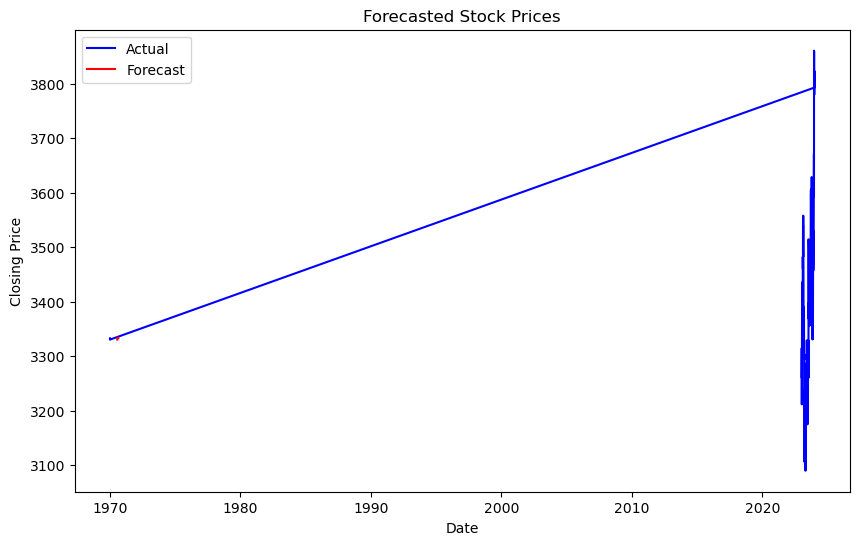

In [26]:
# Plot the original data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data, label='Actual', color='blue')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.title('Forecasted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()